In [57]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.optim as optim
from torch import nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision.transforms import v2
from datasets import load_dataset

In [27]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [8]:
ds = load_dataset("mnist")

In [117]:
transform = v2.Compose([v2.ToTensor(), v2.ConvertImageDtype()])
X_train = torch.stack(list(map(transform, ds['train']['image'])))
y_train = torch.tensor(ds['train']['label'])
X_test = torch.stack(list(map(transform, ds['test']['image'])))
y_test = torch.tensor(ds['test']['label'])

c:\Users\Ngu\mambaforge\envs\ml_env\Lib\site-packages\torchvision\transforms\v2\_deprecated.py:41: UserWarning: The transform `ToTensor()` is deprecated and will be removed in a future release. Instead, please use `transforms.Compose([transforms.ToImageTensor(), transforms.ConvertImageDtype()])`.
  warnings.warn(


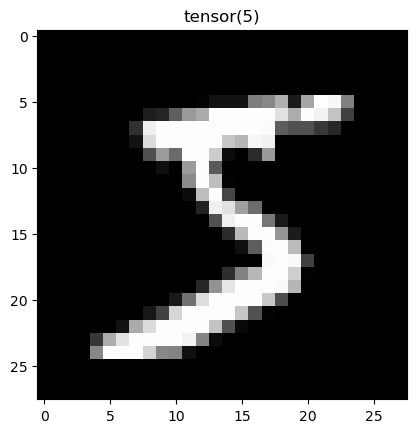

In [71]:
image = X_train[0][0]
plt.title(y_train[0])
plt.imshow(image, cmap='gray')

In [98]:
# Define the hyperparameters
input_size = 28 * 28  # MNIST image size is 28x28
hidden_size = 128
num_classes = 10
learning_rate = 0.01
batch_size = 64
num_epochs = 2

In [99]:
model_linear = nn.Sequential(
    nn.Flatten(),
    nn.Linear(input_size, hidden_size),
    nn.ReLU(),
    nn.Linear(hidden_size, num_classes)
)
opt = optim.SGD(model_linear.parameters(), lr=learning_rate)
loss_func = F.cross_entropy

model_linear

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

In [100]:
train_data = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)

# Set model to training mode
model_linear.train()

# Training loop
for epoch in range(num_epochs):
    for batch_idx, (Xb, yb) in enumerate(train_loader):
        # Move the data and targets to the device
        Xb = Xb.to(device)
        yb = yb.to(device)
        
        # Forward pass
        pred = model_linear(Xb)
        loss = loss_func(pred, yb)
        
        # Backward pass and optimization
        loss.backward()
        opt.step()
        opt.zero_grad()
        
        # Print the loss every 100 batches
        if (batch_idx + 1) % 100 == 0:
            print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{batch_idx+1}/{len(train_loader)}], Loss: {loss.item():.4f}")

Epoch [1/2], Batch [100/938], Loss: 2.0933
Epoch [1/2], Batch [200/938], Loss: 1.7260
Epoch [1/2], Batch [300/938], Loss: 1.4895
Epoch [1/2], Batch [400/938], Loss: 1.2697
Epoch [1/2], Batch [500/938], Loss: 1.0470
Epoch [1/2], Batch [600/938], Loss: 0.8770
Epoch [1/2], Batch [700/938], Loss: 0.7655
Epoch [1/2], Batch [800/938], Loss: 0.6448
Epoch [1/2], Batch [900/938], Loss: 0.5915
Epoch [2/2], Batch [100/938], Loss: 0.6314
Epoch [2/2], Batch [200/938], Loss: 0.4773
Epoch [2/2], Batch [300/938], Loss: 0.4479
Epoch [2/2], Batch [400/938], Loss: 0.4776
Epoch [2/2], Batch [500/938], Loss: 0.4837
Epoch [2/2], Batch [600/938], Loss: 0.4357
Epoch [2/2], Batch [700/938], Loss: 0.4630
Epoch [2/2], Batch [800/938], Loss: 0.4952
Epoch [2/2], Batch [900/938], Loss: 0.3887


In [101]:
def accuracy(out, y_batch): 
    return (torch.argmax(out, dim=1)==y_batch).float().mean()

In [120]:
accuracy(model_linear(X_test), y_test)

tensor(0.8938)

In [104]:
torch.save(model_linear, "mlp.pth")

In [105]:
model = torch.load("mlp.pth")
model.eval()

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=128, bias=True)
  (2): ReLU()
  (3): Linear(in_features=128, out_features=10, bias=True)
)

tensor(9)
tensor(9)
tensor([[-1.7436, -5.4369, -3.6409, -2.7840,  3.2032,  0.0910, -2.3308,  4.4494,
          0.8283,  5.7964]], grad_fn=<AddmmBackward0>)


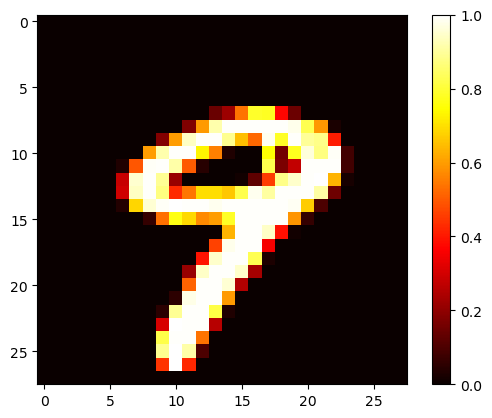

In [164]:
num = 9
print(y_test[num])
print(torch.argmax(model(X_test[num])))
print(model(X_test[num]))
plt.imshow(X_test[num][0], cmap="gray")
# X_train[num]
plt.imshow(X_test[num][0], cmap='hot')
plt.colorbar()
plt.show()

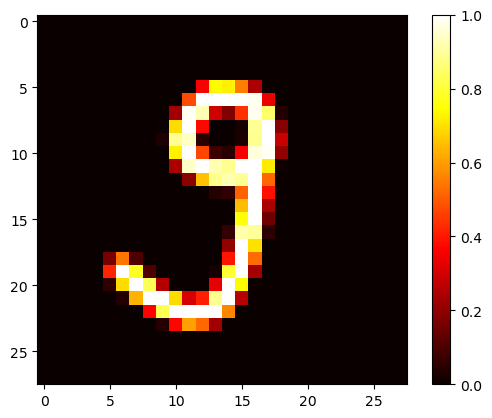

In [163]:
from PIL import Image

image = Image.open("../saved_image.png")

image = torch.tensor(np.array(image)) / 255
image = image.unsqueeze(0)
# print(image.shape)
# print(torch.argmax(model(image)))
# print(model(image))
# plt.imshow(image[0], cmap="gray")
import matplotlib.pyplot as plt

# Assuming your 2D tensor is named 'tensor'
plt.imshow(image[0], cmap='hot')
plt.colorbar()
plt.show()
